# 模块调用

将第 4 节代码整合成 `transformer_encoder.py` 文件，再调用此文件做推理或训练模型。

In [1]:
import torch
import pandas as pd
import transformer_encoder as tfe

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMDB_FILE = './data/IMDB Dataset.csv'
MODEL_FILE = './data/model_weight.pth'

batch_size = 25

## 1. 推理

In [3]:
df = pd.read_csv(IMDB_FILE)
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# 定义模型，然后从权重文件中加载权重
net = tfe.BertTransformerEncoder(n_classes=2)
net.load_state_dict(torch.load(MODEL_FILE, weights_only=True))

net.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

In [5]:
X, y = tfe.prepare(sample_num=200, df=df)
train_iter, test_iter = tfe.load_data(X, y, batch_size=batch_size, test_size=0.5)

Pandas Apply:   0%|          | 0/200 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/200 [00:00<?, ?it/s]

In [6]:
for data in test_iter:
    y = data['label']
    y_hat = net(input_ids=data['input_ids'].to(device),
                attention_mask=data['attention_mask'].to(device))

y_hat

tensor([[-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282],
        [-2.7663, -2.7282]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [7]:
y_hat.argmax(axis=1), y

(tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1], device='cuda:0'),
 tensor([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
         0]))

## 2. 训练

In [4]:
df_sample = df.sample(n=100)
df_sample['sentiment'].value_counts()

sentiment
negative    52
positive    48
Name: count, dtype: int64

train_loss: 5.269
train_acc: 0.463
test_acc: 0.550


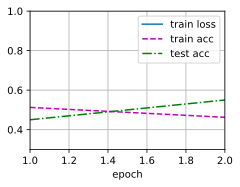

In [5]:
tfe.main(batch_size=batch_size,
         num_epochs=2,
         freeze_bert=True,
         df=df_sample)